In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 

### Loading MNIST Data :

In [21]:
(train_images, train_labels) , (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## EDA on Data : 

In [22]:
print("Training set images shape:", train_images.shape)  
print("Training set labels shape:", train_labels.shape)
print("Test set images shape:", test_images.shape) 
print("Test set labels shape:", test_labels.shape)


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


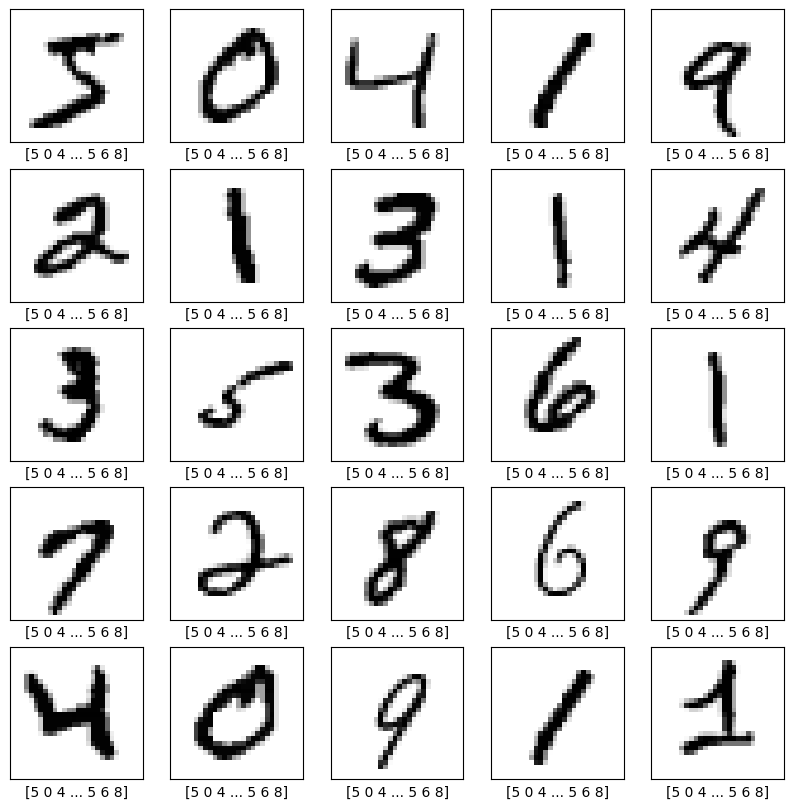

In [23]:
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels)
plt.show()

## Task 1 : 

### Selecting a Random Sample : 

In [24]:
random_index = np.random.randint(0,len(train_images))
sample_image, sample_label = train_images[random_index], train_labels[random_index]

In [25]:
sample_label

4

### Plotting the Sample : 

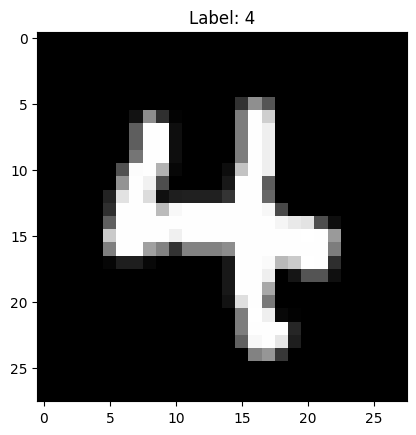

In [26]:
plt.imshow(sample_image,cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()

### Examples of activation functions : 

Five commonly used activation functions in neural networks:

<b>ReLU (Rectified Linear Unit)</b><br>
<b>Formula:</b> f(x) = max(0, x)<br>
<b>Description:</b> ReLU is widely used due to its simplicity and efficiency. It outputs the input directly if it's positive, otherwise, it outputs zero.<br><br>

<b>Sigmoid</b><br>
<b>Formula:</b> f(x) = 1 / (1 + e^(-x))<br>
<b>Description:</b> The sigmoid function outputs values between 0 and 1, making it suitable for binary classification problems.<br><br>

<b>Tanh (Hyperbolic Tangent)</b><br>
<b>Formula:</b> f(x) = (e^x - e^(-x)) / (e^x + e^(-x))<br>
<b>Description:</b> Similar to sigmoid but outputs values between -1 and 1. Useful when the model needs to make decisions between two extremes.<br><br>

<b>Softmax</b><br>
<b>Formula:</b> In a vector of real numbers x, the Softmax of the ith element is e^(x_i) / sum(e^(x_j))<br>
<b>Description:</b> Often used in the output layer of a neural network for multi-class classification, returning probabilities of each class.<br><br>

<b>Leaky ReLU</b><br>
<b>Formula:</b> f(x) = x if x > 0; f(x) = αx otherwise, where α is a small constant.<br>
<b>Description:</b> A variation of ReLU that allows a small gradient when the unit is not active, helping to mitigate the dying ReLU problem.

## Task 2 : 